In [14]:
import numpy as np
import pickle
import skimage.transform
import scipy
import numpy as np
import theano
import theano.tensor as T
from theano import config
import matplotlib.pyplot as plt
%matplotlib inline
floatX=theano.config.floatX

In [15]:
from nn import ConvLayer, adam
from theano.tensor.signal import pool
IMAGE_W =400
class vgg19(object):
    def __init__(self, input, width_1, values):
       

        self.input=input.reshape((1,3,width_1,width_1))
        #self.input=input
        rng=np.random.RandomState(11)
        self.layers={}
        
        self.conv1_1 = ConvLayer(rng,
            input=self.input,
            image_shape=(1, 3, width_1, width_1),
            filter_shape=(64, 3, 3, 3),
            border_mode=1,
            W = values[0],
            b = values[1]
        )
        self.conv1_2 = ConvLayer(
            rng,
            input=self.conv1_1.output,
            image_shape=(1, 64, width_1, width_1),
            filter_shape=(64, 64, 3, 3),
            border_mode=1,
            W = values[2],
            b = values[3]
        )
        self.pool1 = pool.pool_2d(
            input=self.conv1_2.output,
            ds=(2,2),
            mode = 'average_exc_pad',
            ignore_border = True
        )
        width_2 = width_1/2


        self.conv2_1 = ConvLayer(
            rng,
            input=self.pool1,
            image_shape=(1, 64, width_2, width_2),
            filter_shape=(128, 64, 3, 3),
            border_mode=1,
            W = values[4],
            b = values[5]
        )
        self.conv2_2  = ConvLayer(
            rng,
            input=self.conv2_1.output,
            image_shape=(1, 128, width_2, width_2),
            filter_shape=(128, 128, 3, 3),
            border_mode=1,
            W = values[6],
            b = values[7]
        )
        self.pool2 = pool.pool_2d(
                input=self.conv2_2.output,
                ds=(2,2),
                mode = 'average_exc_pad',
                ignore_border = True
        )    
        width_3 = width_2/2
        
        self.conv3_1 = ConvLayer(
            rng,
            input=self.pool2,
            image_shape=(1, 128, width_3, width_3),
            filter_shape=(256, 128, 3, 3),
            border_mode=1,
            W = values[8],
            b = values[9]
        )
        
        self.conv3_2 = ConvLayer(
            rng,
            input=self.conv3_1.output,
            image_shape=(1, 256, width_3, width_3),
            filter_shape=(256, 256, 3, 3),
            border_mode=1,
            W = values[10],
            b = values[11]
        )
        self.conv3_3 = ConvLayer(
            rng,
            input=self.conv3_2.output,
            image_shape=(1, 256, width_3, width_3),
            filter_shape=(256, 256, 3, 3),
            border_mode=1,
            W = values[12],
            b = values[13]
        )

        self.conv3_4 = ConvLayer(
            rng,
            input=self.conv3_3.output,
            image_shape=(1, 256, width_3, width_3),
            filter_shape=(256, 256, 3, 3),
            border_mode=1,
            W = values[14],
            b = values[15]
        )
        self.pool3 = pool.pool_2d(
                input=self.conv3_4.output,
                ds=(2,2),
                mode = 'average_exc_pad',
                ignore_border = True
        ) 
        width_4 = width_3/2
        self.conv4_1 = ConvLayer(
            rng,
            input=self.pool3,
            image_shape=(1, 256, width_4, width_4),
            filter_shape=(512, 256, 3, 3),
            border_mode=1,
            W = values[16],
            b = values[17]
        )
        self.conv4_2 = ConvLayer(
            rng,
            input=self.conv4_1.output,
            image_shape=(1, 512, width_4, width_4),
            filter_shape=(512, 512, 3, 3),
            border_mode=1,
            W = values[18],
            b = values[19]
        )
        self.conv4_3 = ConvLayer(
            rng,
            input=self.conv4_2.output,
            image_shape=(1, 512, width_4, width_4),
            filter_shape=(512, 512, 3, 3),
            border_mode=1,
            W = values[20],
            b = values[21]
        )

        self.conv4_4 = ConvLayer(
            rng,
            input=self.conv4_3.output,
            image_shape=(1, 512, width_4, width_4),
            filter_shape=(512, 512, 3, 3),
            border_mode=1,
            W = values[22],
            b = values[23]
        )
        self.pool4 = pool.pool_2d(
                input=self.conv4_4.output,
                ds=(2,2),
                mode = 'average_exc_pad',
                ignore_border = True
        ) 
        width_5 = width_4/2
        self.conv5_1 = ConvLayer(
            rng,
            input=self.pool4,
            image_shape=(1, 512, width_5, width_5),
            filter_shape=(512, 512, 3, 3),
            border_mode=1,
            W = values[24],
            b = values[25]
        )
        self.conv5_2 = ConvLayer(
            rng,
            input=self.conv5_1.output,
            image_shape=(1, 512, width_5, width_5),
            filter_shape=(512, 512, 3, 3),
            border_mode=1,
            W = values[26],
            b = values[27]
        )
        self.conv5_3 = ConvLayer(
            rng,
            input=self.conv5_2.output,
            image_shape=(1, 512, width_5, width_5),
            filter_shape=(512, 512, 3, 3),
            border_mode=1,
            W = values[28],
            b = values[29]
        )

        self.conv5_4 = ConvLayer(
            rng,
            input=self.conv5_3.output,
            image_shape=(1, 512, width_5, width_5),
            filter_shape=(512, 512, 3, 3),
            border_mode=1,
            W = values[30],
            b = values[31]
        )
        self.pool5 = pool.pool_2d(
                input=self.conv5_4.output,
                ds=(2,2),
                mode='average_exc_pad',
                ignore_border = True
            
        )
        self.output=self.pool5
        self.layers['conv1_1']=self.conv1_1
        self.layers['conv1_2']=self.conv1_2
        self.layers['conv2_1']=self.conv2_1
        self.layers['conv2_2']=self.conv2_2
        self.layers['conv3_1']=self.conv3_1
        self.layers['conv3_2']=self.conv3_2
        self.layers['conv3_3']=self.conv3_3
        self.layers['conv3_4']=self.conv3_4
        self.layers['conv4_1']=self.conv4_1
        self.layers['conv4_2']=self.conv4_2
        self.layers['conv4_3']=self.conv4_3
        self.layers['conv4_4']=self.conv4_4
        self.layers['conv5_1']=self.conv5_1
        self.layers['conv5_2']=self.conv5_2
        self.layers['conv5_3']=self.conv5_3
        self.layers['conv5_4']=self.conv5_4

    def set_params(self,values):
        i=0
        for name_key in self.layers.keys():
            print np.array(values[i]).shape
            self.layers[name_key].set_param(values[i],values[i+1])
            i=i+2

In [16]:
#!wget https://s3.amazonaws.com/lasagne/recipes/pretrained/imagenet/vgg19_normalized.pkl

In [17]:

values = pickle.load(open('vgg19_normalized.pkl'))['param values']
#preload_image =pickle.load(open('generated_image.pkl'))[0]


In [18]:

photo = plt.imread('../../data/Tuebingen_Neckarfront.jpg')


In [19]:
#!wget https://s3.amazonaws.com/lasagne/recipes/pretrained/imagenet/vgg19_normalized.pkl


In [20]:
def build_model():
    X=T.matrix('X')
    conv_layer=vgg19(X,IMAGE_W)
    conv_layer.set_params(values)
    #InputLayer((1, 3, IMAGE_W, IMAGE_W))
    net=conv_layer.layers
    net['input']= conv_layer.input 
    net['pool5'] =conv_layer.output
    return conv_layer,net


In [21]:
# build VGG net and load weights
values = pickle.load(open('vgg19_normalized.pkl'))['param values']
# conv_layer,net = build_model()


In [22]:
MEAN_VALUES = np.array([104, 117, 123]).reshape((3,1,1))

def prep_image(im):
    if len(im.shape) == 2:
        im = im[:, :, np.newaxis]
        im = np.repeat(im, 3, axis=2)
    h, w, _ = im.shape
    if h < w:
        im = skimage.transform.resize(im, (IMAGE_W, w*IMAGE_W/h), preserve_range=True)
    else:
        im = skimage.transform.resize(im, (h*IMAGE_W/w, IMAGE_W), preserve_range=True)

    # Central crop
    h, w, _ = im.shape
    im = im[h//2-IMAGE_W//2:h//2+IMAGE_W//2, w//2-IMAGE_W//2:w//2+IMAGE_W//2]
    
    rawim = np.copy(im).astype('uint8')
    
    # Shuffle axes to c01
    im = np.swapaxes(np.swapaxes(im, 1, 2), 0, 1)
    
    # Convert RGB to BGR
    im = im[::-1, :, :]

    im = im - MEAN_VALUES
    return rawim, np.asarray(
                im[np.newaxis],
                dtype=theano.config.floatX
            )

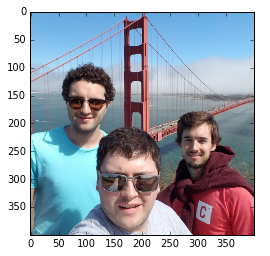

In [23]:
photo = plt.imread('../../data/Tuebingen_Neckarfront.jpg')
photo = plt.imread('../../data/photo.jpg')
rawim, photo = prep_image(photo)
plt.imshow(rawim)

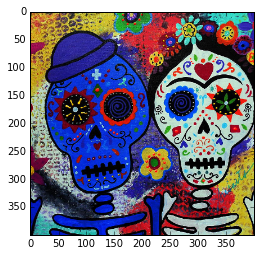

In [24]:
art = plt.imread('../../data/1920px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')
art = plt.imread('../../data/dia-muertos.jpg')
rawim, art = prep_image(art)
plt.imshow(rawim)

In [25]:
def gram_matrix(x):
    x = x.flatten(ndim=3)
    g = T.tensordot(x, x, axes=([2], [2]))
    return g


def content_loss(P, X, layer):
    p = P[layer]
    x = X[layer]
    
    loss = 1./2 * ((x - p)**2).sum()
    return loss


def style_loss(A, X, layer):
    a = A[layer]
    x = X[layer]
    
    A = gram_matrix(a)
    G = gram_matrix(x)
    
    N = a.shape[1]
    M = a.shape[2] * a.shape[3]
    
    loss = 1./(4 * N**2 * M**2) * ((G - A)**2).sum()
    return loss

def total_variation_loss(x):
    return (((x[:,:,:-1,:-1] - x[:,:,1:,:-1])**2 + (x[:,:,:-1,:-1] - x[:,:,:-1,1:])**2)**1.25).sum()

In [26]:
layers = ['conv4_2', 'conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']

In [27]:

conv_layer=vgg19(photo, IMAGE_W, values)
#conv_layer.set_params(values)
net=conv_layer.layers
net['input']= conv_layer.input 
net['pool5'] =conv_layer.output

photo_features = {}
for k in layers:
    photo_features[k] = theano.shared(np.asarray(net[k].output.eval(), dtype = theano.config.floatX))
    #photo_features[k] = net[k].output

conv_layer=vgg19(art, IMAGE_W, values)
#conv_layer.set_params(values)
net=conv_layer.layers
net['input']= conv_layer.input 
net['pool5'] =conv_layer.output

art_features = {}
for k in layers:
    art_features[k] = theano.shared(np.asarray(net[k].output.eval(), dtype = theano.config.floatX))


In [28]:
# Get expressions for layer activations for generated image
# generated_image = theano.shared(np.asarray(np.random.uniform(-128, 128, (1, 3, IMAGE_W, IMAGE_W)), 
#                                           dtype = theano.config.floatX))
x0 = pickle.load(open('../../data/generated/photo-muertos.pkl'))[0]
generated_image = theano.shared(np.asarray(x0, 
                                          dtype = theano.config.floatX))



conv_layer=vgg19(generated_image, IMAGE_W, values)
#conv_layer.set_params(values)
net=conv_layer.layers
net['input']= conv_layer.input 
net['pool5'] =conv_layer.output

gen_features = {}
for k in layers:
    gen_features[k] = net[k].output

In [29]:
# Define loss function
# losses = []

# # content loss
# losses.append(0.01 * content_loss(photo_features, gen_features, 'conv4_2'))

# # style loss
# losses.append(0.2e6 * style_loss(art_features, gen_features, 'conv1_1'))
# losses.append(0.2e6 * style_loss(art_features, gen_features, 'conv2_1'))
# losses.append(0.2e6 * style_loss(art_features, gen_features, 'conv3_1'))
# losses.append(0.2e6 * style_loss(art_features, gen_features, 'conv4_1'))
# losses.append(0.2e6 * style_loss(art_features, gen_features, 'conv5_1'))

# # total variation penalty
# losses.append(0.1e-7 * total_variation_loss(generated_image))

# total_loss = sum(losses)

alpha = 0.001

beta = 0.1e5
# beta = 0.1e3
# 5, 1e2
total_loss = alpha*content_loss(photo_features, gen_features, 'conv4_2') + beta *style_loss(art_features, gen_features, 'conv1_1')+\
                + beta *style_loss(art_features, gen_features, 'conv2_1')+ beta *style_loss(art_features, gen_features, 'conv3_1')+\
                + beta *style_loss(art_features, gen_features, 'conv4_1')+ beta *style_loss(art_features, gen_features, 'conv5_1')
    

In [30]:
def deprocess(x):
    x = np.copy(x[0])
    x += MEAN_VALUES

    x = x[::-1]
    x = np.swapaxes(np.swapaxes(x, 0, 1), 1, 2)
    
    x = np.clip(x, 0, 255).astype('uint8')
    return x


In [31]:
import time

updates = adam([generated_image], total_loss, lr =.1)
xs = []


In [ ]:
train_model = theano.function(
    inputs=[],
    outputs=total_loss,
    updates=updates
)
start_time = time.time()
for i in range(10000):
    elapsed_time = time.time() - start_time

    loss = train_model()
    if i % 1 == 0:
        print 'iter ' + str(i)
        print '-loss ' + str(loss)
        print '-elapsed_time ' + str(elapsed_time)
    x0 = generated_image.get_value().astype('float64')

    if i % 5 == 0 and i!=0:  
        with open('../../data/generated/photo-muertos.pkl', 'w') as f: 
            pickle.dump([x0], f)
    if i % 20 == 0 and i!=0:
        xs.append(x0)
        with open('../../data/generated/photo-muertos_images-2.pkl', 'w') as f: 
            pickle.dump([xs], f)

iter 0
-loss 2297.78031953
-elapsed_time 0.000771999359131
iter 1
-loss 6158.16540391
-elapsed_time 87.3818600178
iter 2

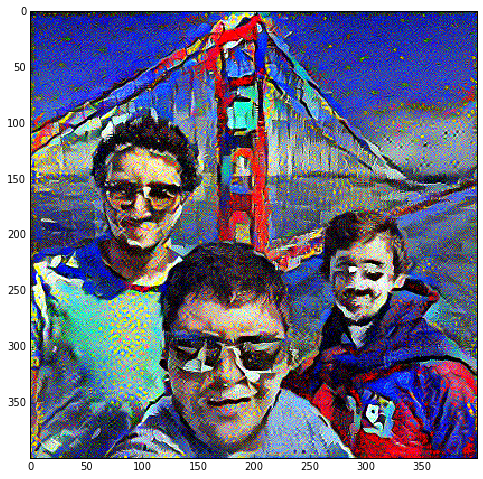

In [8]:

plt.figure(figsize=(8,8))
plt.imshow(deprocess(x0), interpolation='nearest')

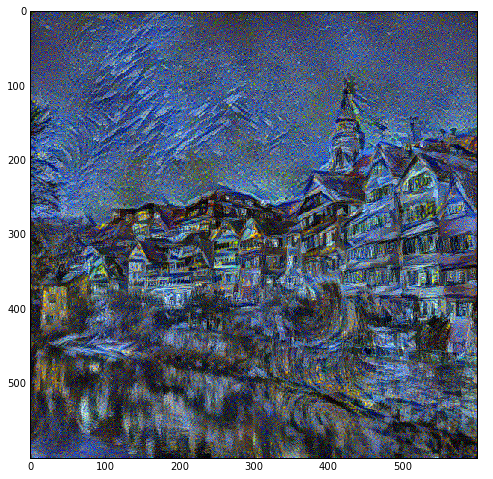

In [46]:
van_gogh_tuebingen = pickle.load(open('../../data/generated/van_gogh-tuebingen.pkl'))[0]
# van_gogh_tuebingen= theano.shared(np.asarray(van_gogh_tuebingen, 
#                                           dtype = theano.config.floatX))
# van_gogh_tuebingen.shape()
plt.figure(figsize=(8,8))
plt.imshow(deprocess(van_gogh_tuebingen), interpolation='nearest')

In [31]:
np.shape(art_features['conv1_1'].eval())
#plt.imshow(art_features['conv1_1'].eval())

(1, 64, 600, 600)

In [69]:
for i in range(len(values)):
    print np.array(values[i]).shape

(64, 3, 3, 3)
(64,)
(64, 64, 3, 3)
(64,)
(128, 64, 3, 3)
(128,)
(128, 128, 3, 3)
(128,)
(256, 128, 3, 3)
(256,)
(256, 256, 3, 3)
(256,)
(256, 256, 3, 3)
(256,)
(256, 256, 3, 3)
(256,)
(512, 256, 3, 3)
(512,)
(512, 512, 3, 3)
(512,)
(512, 512, 3, 3)
(512,)
(512, 512, 3, 3)
(512,)
(512, 512, 3, 3)
(512,)
(512, 512, 3, 3)
(512,)
(512, 512, 3, 3)
(512,)
(512, 512, 3, 3)
(512,)


In [13]:
values = pickle.load(open('vgg19_normalized.pkl'))['param values']

conv_layer=vgg19(photo, IMAGE_W)
# conv_layer.set_params(values)
net=conv_layer.layers
# net['input']= conv_layer.input
# net['pool5'] =conv_layer.output



In [14]:
conv_layer.set_params(values)

(64, 3, 3, 3)
(64, 64, 3, 3)
(128, 64, 3, 3)
(128, 128, 3, 3)
(256, 128, 3, 3)
(256, 256, 3, 3)
(256, 256, 3, 3)
(256, 256, 3, 3)
(512, 256, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)


In [16]:
net['conv1_2'].W.eval().shape

(512, 512, 3, 3)

In [60]:
xs[-1].shape

(1, 3, 600, 600)